# Heart failure mortality prediction challenge

Here we will analize Kaggle Heart failure prediction dataset: https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records/data ... 

<p align="center">
  <img src="misc/dataset-cover.png" style="width:75%;">
</p>

The dataset contains the medical records of 5000 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- DEATH_EVENT: if the patient died during the follow-up period (boolean)

Let's explore the dataset and provide answers to the following questions:
1. In this cohort, what is the probability of death within 30 days?
2. In this cohort, how long does it usually take to die from heart failure?
3. What factors impact survival?
4. How well can we predict heart failure mortality?

### Initial dataset exploration (EDA)

As a first step, we will load the provided `.csv` file and explore the dataset. This EDA step will involve getting a clear picture of all the variables in the dataset, their data types and range of values, as well as getting a first look at their distribution and correlations, looking for outliers or inconsistencies.

In [1]:
# --- Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heart_failure_utils as hfu
import importlib
importlib.reload(hfu)
# Set style
selected_palette, selected_div_cmap, selected_color_gradient_cmap = hfu.set_plot_style()
# Display versions
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.3
Numpy version: 2.2.5
Seaborn version: 0.13.2


In [2]:
#  --- Read and display the dataset
df = pd.read_csv("data/heart_failure_clinical_records.csv")
print("Shape of data frame: ", df.shape)
df.head(10)

Shape of data frame:  (5000, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0
9,53.0,1,446,0,45,1,274000.00,1.0,133,1,0,215,0


In [3]:
# --- Print the data types of the columns 
print("Data types of the columns:", df.dtypes)

Data types of the columns: age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [4]:
# --- Check for null values in the data frame 
print("Number of null values in each column:")
print(df.isnull().sum())
print("Total number of null values in the data frame:", df.isnull().sum().sum())

Number of null values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Total number of null values in the data frame: 0


In [5]:
# --- Check for duplicates in the data frame 
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# --- Show all rows that match the duplicate row
duplicate_row = df[df.duplicated()].iloc[0]
print("Example duplicate row id: ", duplicate_row.name)
mask = (df == duplicate_row).all(axis=1)
df[mask]

Number of duplicate rows: 3680
Example duplicate row id:  18


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
11,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
18,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
171,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
316,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
349,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
405,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
460,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
512,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
542,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
650,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1


Interestingly, a large fraction of the 5000 rows in this Kaggle dataset are exact duplicates. The original UCI Heart Failure Clinical Records dataset cited on the Kaggle page contains only 299 patients, so the 5000-row version must have been produced by replication/augmentation before upload and / or merging with other datasets, without any documentation. This is disappointing from a data quality perspective because the true sample size is much smaller than advertised, but it is an important finding: we can now de-duplicate the dataset to work with a set of unique patient records.

In [6]:
# --- Remove duplicates from the data frame 
print(f"Shape of data frame before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"New shape of data frame after removing duplicates: {df.shape}")

Shape of data frame before removing duplicates: (5000, 13)
New shape of data frame after removing duplicates: (1320, 13)


Now each patient in the dataset is uniquely identified, but the discrepancy between the original number of patients and the current number of unique entries remains unexplained. My main hypothesis is that at least part of these additional records are not simple duplicates, but derive from some form of subsampling or augmentation of the original 299-patient dataset, or perhaps from merging with another source. Despite this, the dataset appears consistent and usable for further analysis. Let's further clean up the dataset by casting binary variables to categorical.

In [7]:
# --- Cast binary columns to 'category' dtype
binary_cols = ['DEATH_EVENT', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for col in binary_cols:
    df[col] = df[col].astype('category')
print("Data types of the columns:", df.dtypes)

Data types of the columns: age                          float64
anaemia                     category
creatinine_phosphokinase       int64
diabetes                    category
ejection_fraction              int64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                     category
time                           int64
DEATH_EVENT                 category
dtype: object


Let's quickly explore the distribution of our variables grouping patients that died and patients that did not:

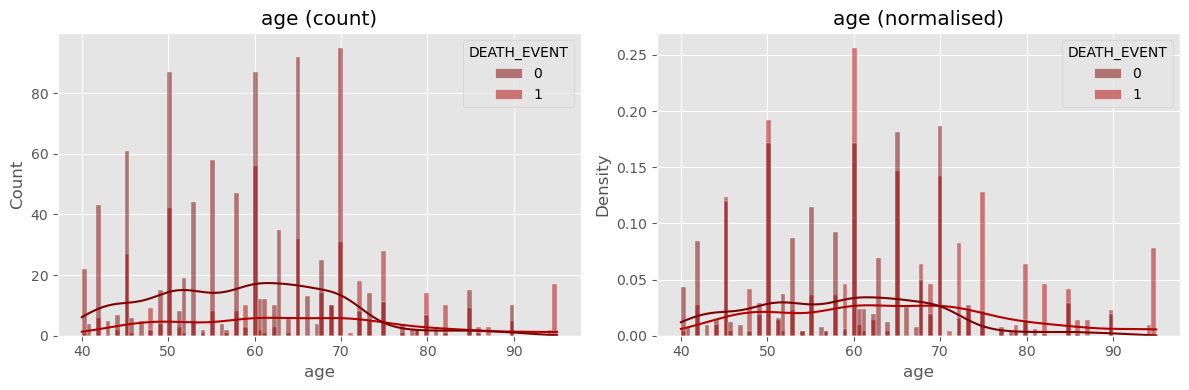

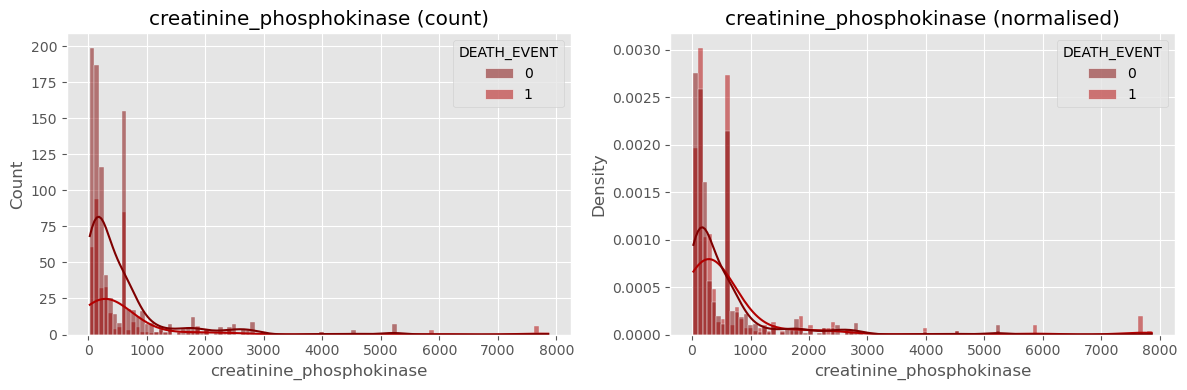

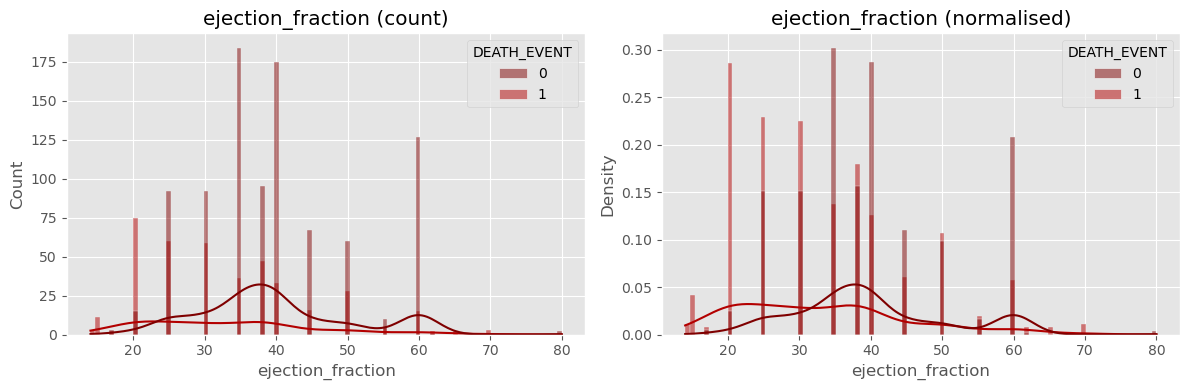

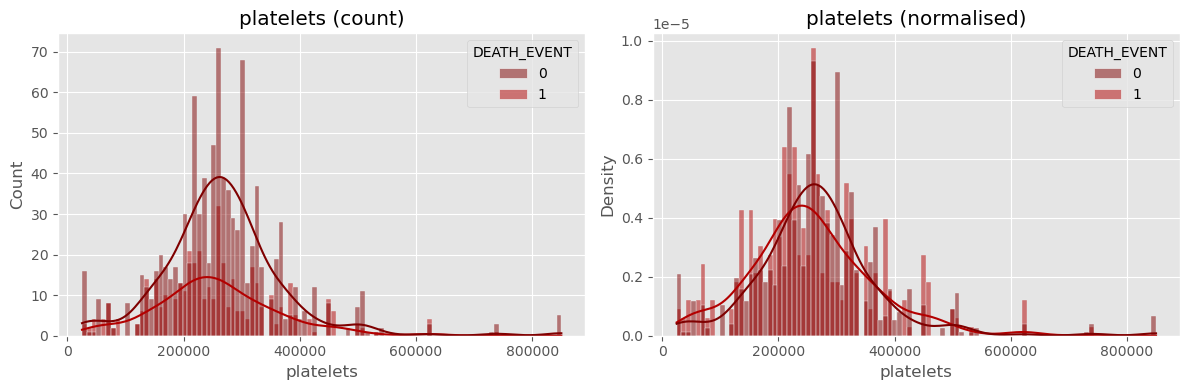

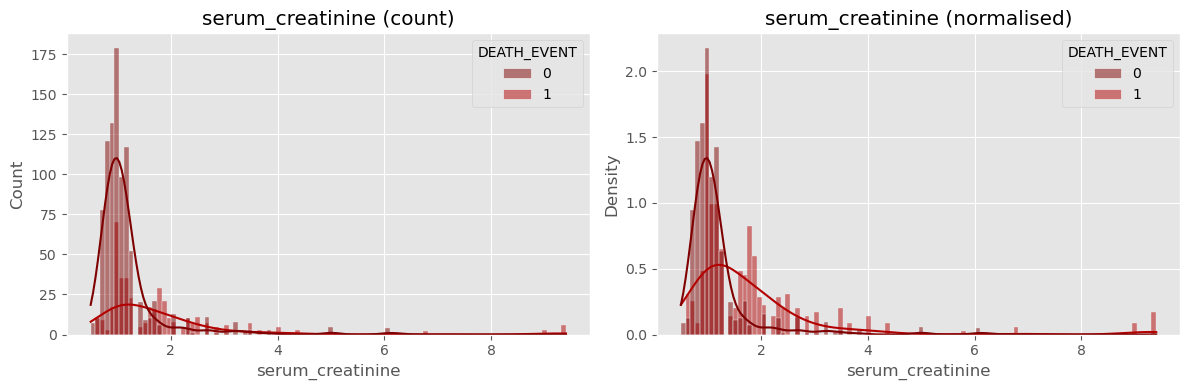

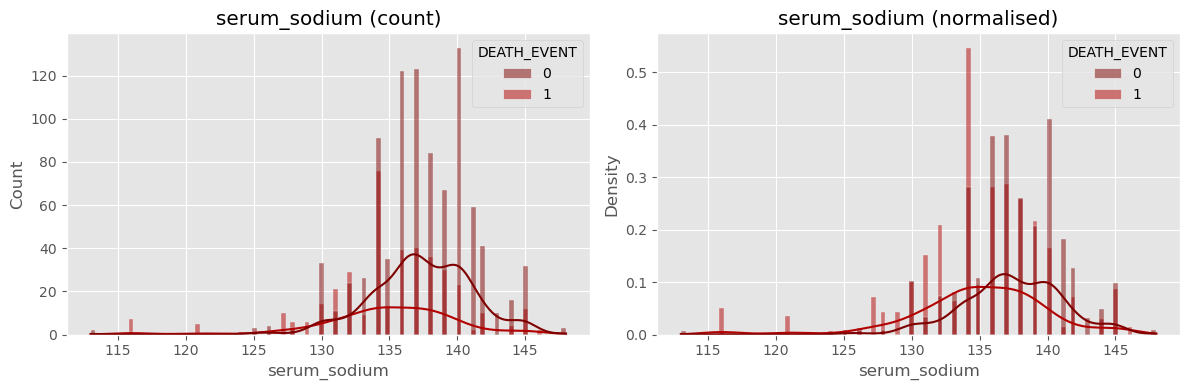

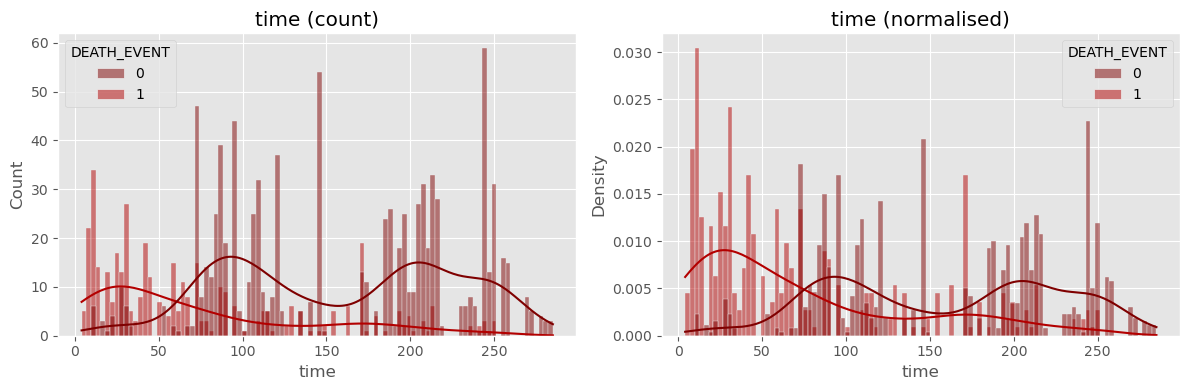

In [8]:
# --- Select numeric columns for analysis 
numeric_cols = df.select_dtypes('number').columns.tolist()
# --- Plot side-by-side histograms of count and normalised density for each numeric column
hfu.plot_numeric_distributions(df, numeric_cols, hue='DEATH_EVENT')

We already notice that variables like ejection fraction, serum creatinine and sodium seem to have some clear relationship on death events.

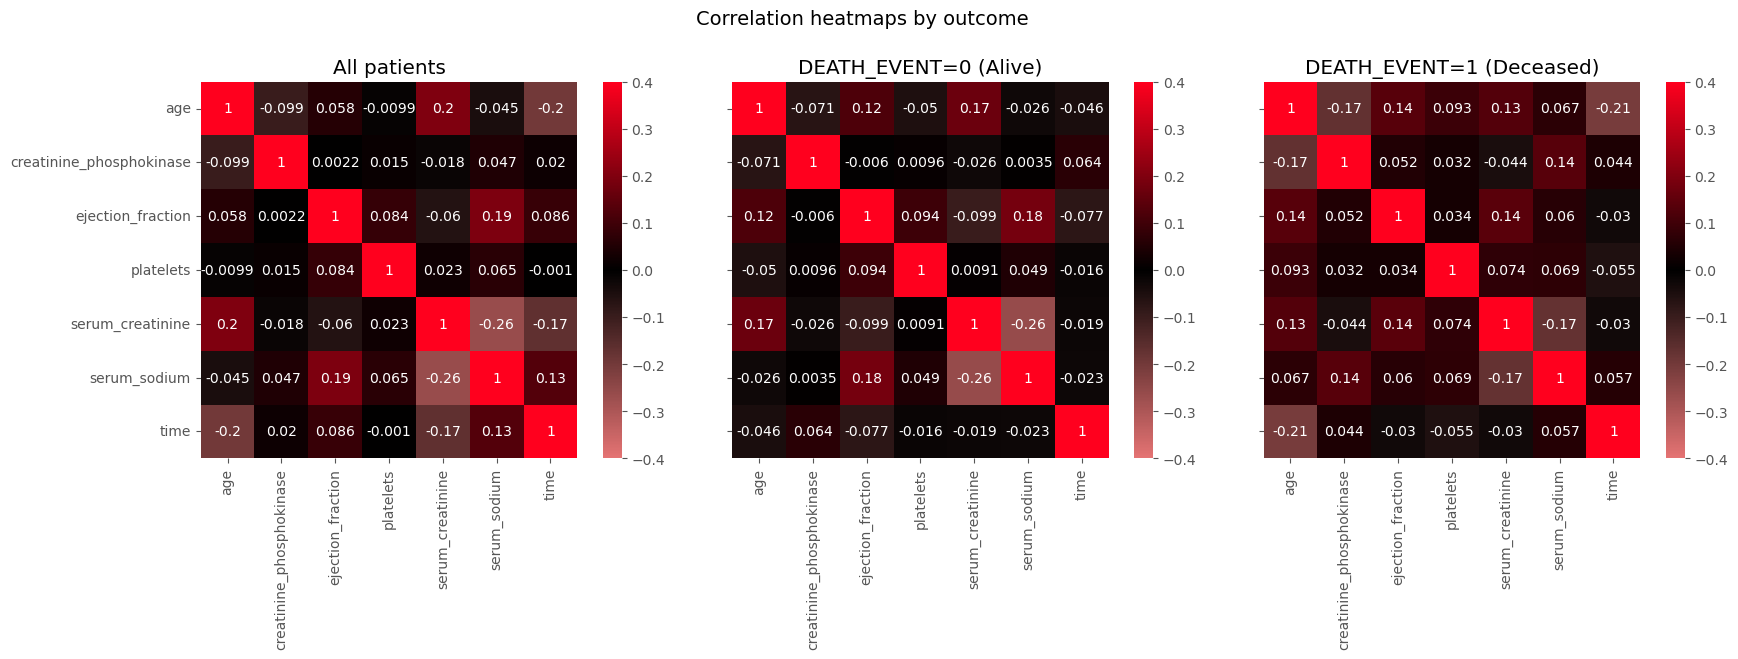

In [9]:
# --- Plot correlation heatmaps for numeric variables ---
hfu.plot_correlation_heatmap(df, numeric_cols, target_col='DEATH_EVENT', cmap=selected_div_cmap)

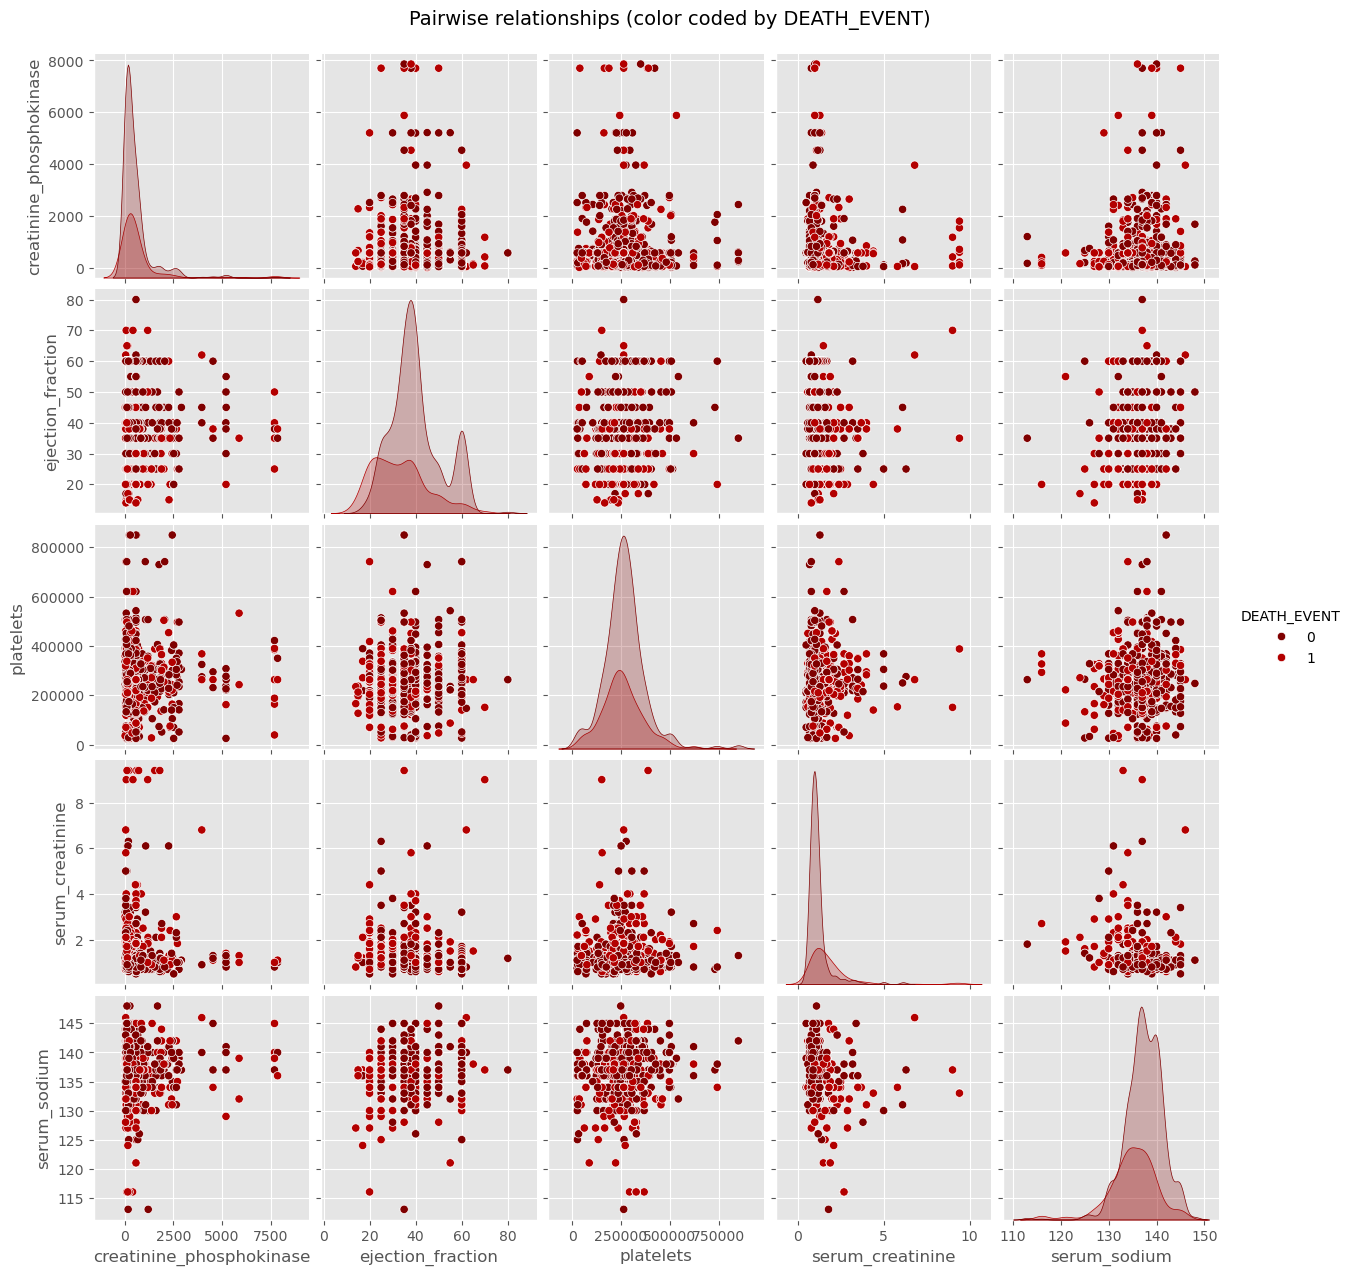

In [10]:
# --- Create pairplot grid for selected numeric variables ---
vars_to_plot = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                'serum_creatinine', 'serum_sodium']
hfu.plot_pairplot(df, vars_to_plot, hue='DEATH_EVENT')

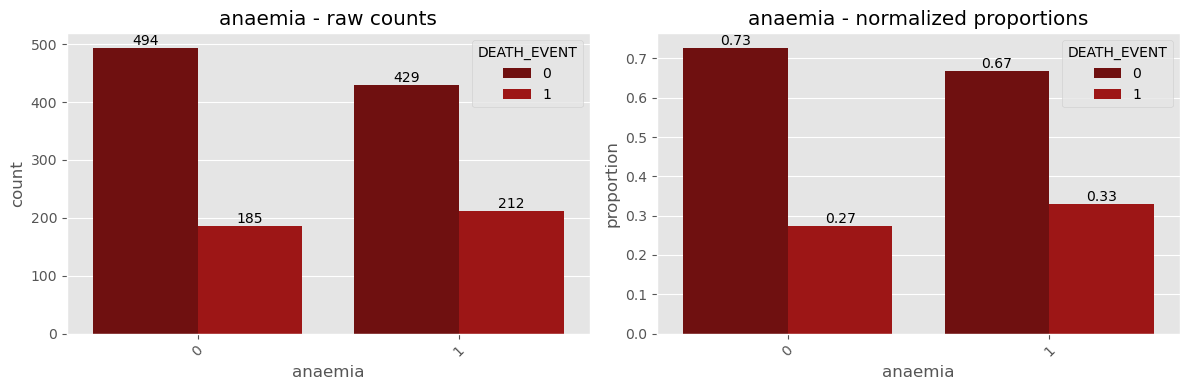

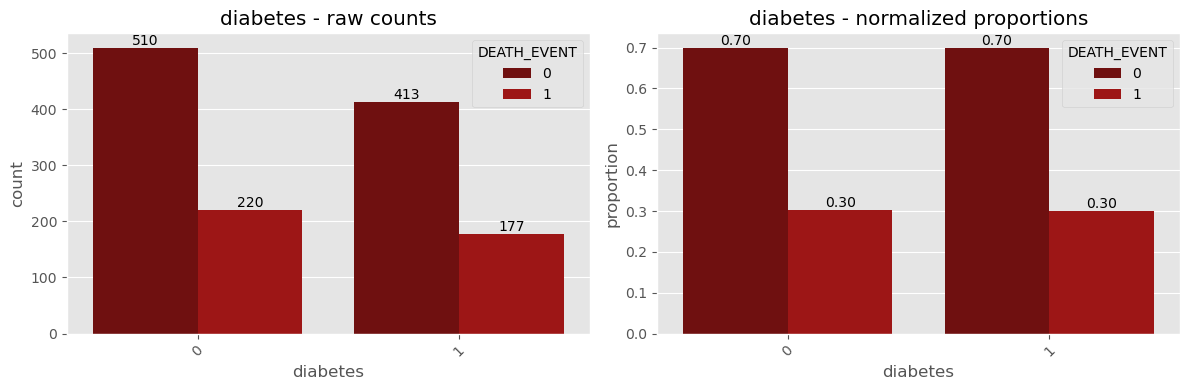

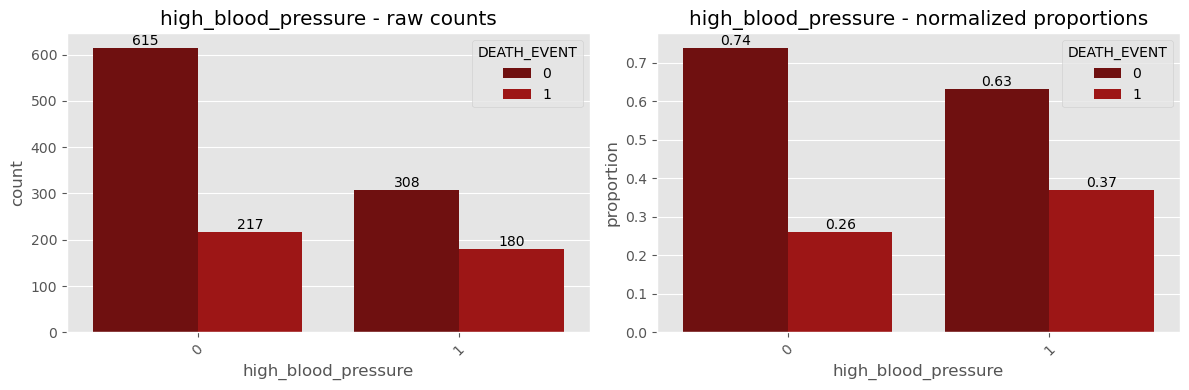

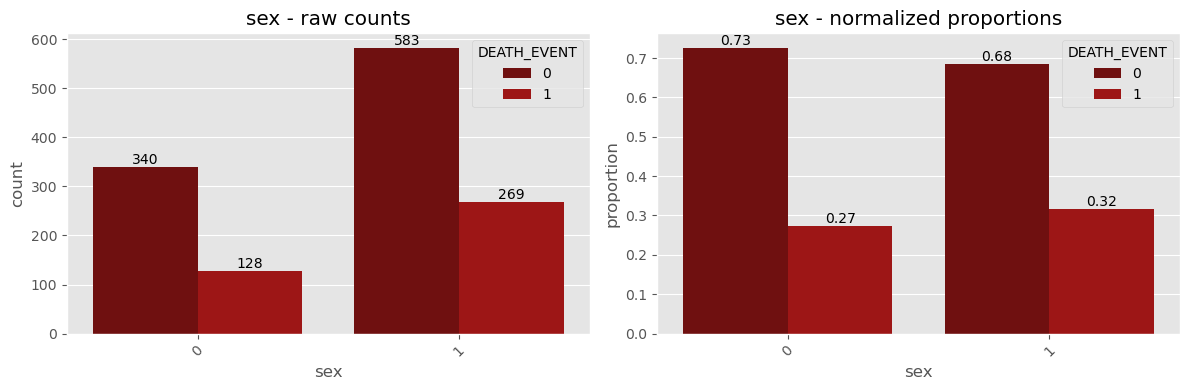

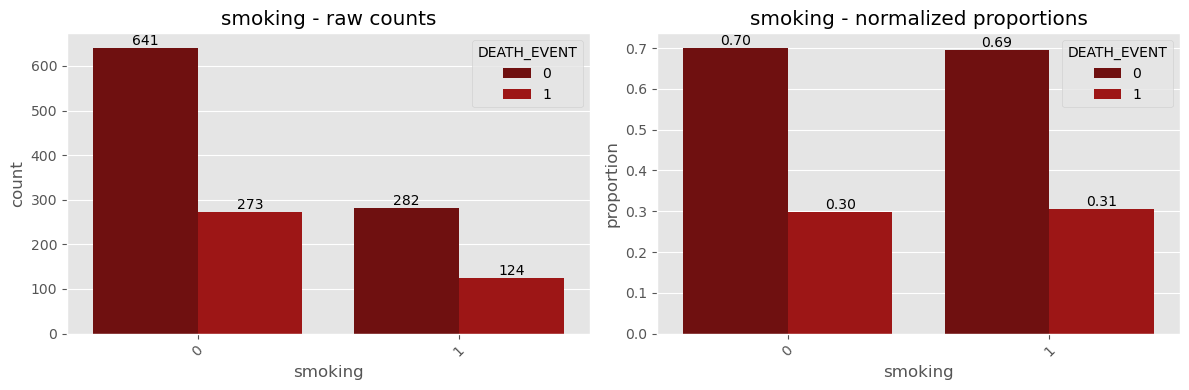

In [11]:
# --- Plot categorical variable distributions ---
categorical_cols = df.select_dtypes('category').columns.tolist()
categorical_cols.remove('DEATH_EVENT')
# --- Visualization of categorical variables with absolute and normalized counts ---
palette = selected_palette[:2]
hfu.plot_categorical_distributions(df, categorical_cols, hue='DEATH_EVENT', palette=palette)

### Preliminary EDA highlights (numerical)

- No missing values were identified in any of the variables.
- A significant number of duplicate rows (3680) were detected. These will need to be removed to avoid bias.
- `time` shows a strong association with the death event, with shorter follow-up times observed in patients who died (likely due to the event terminating the follow-up).
- `ejection_fraction`, `serum_creatinine`, and `serum_sodium` show clear differences between surviving and deceased patients.
- `age` shows a positive association with death, with older patients being more likely to die.
- `creatinine_phosphokinase` and `platelets` do not show a very strong separation between the groups.

### Preliminary EDA highlights (categorical)

- `anaemia` and `high_blood_pressure` appear to have some association with the death event.
- The impact of `diabetes`, `sex`, and `smoking` seems less pronounced or unclear from the visual inspection.

### Planned cleaning and preprocessing

- Duplicate rows will be removed to ensure data integrity.
- Since no missing values were found, no imputation is required.
- Categorical variables are already in a suitable format or will be encoded if necessary.
- Numerical variables may be standardized or normalized depending on the modeling approach.

### Q1: What is the chance of getting heart failure within 30 days?

To estimate the chance of death within 30 days, we initially restrict our analysis to patients whose follow-up lasted at least 30 days, or who died on or before day 30. This filters out patients who were lost to follow-up early without a recorded death event, allowing us to focus on cases where the outcome is fully observable within the time window of interest. We then compute the proportion of these patients who died by day 30. This gives us a naïve, empirical estimate of the cumulative probability of death within 1 year among patients with sufficient follow-up. However, this approach is inherently biased due to "right-censoring": patients who dropped out before 30 days and before dying are excluded. In survival analysis jargon, this censoring can bias our estimates if the reason for dropping out is related to the risk of death. Despite its limitations, this truncated estimate serves as a simple baseline. We’ll address censoring more formally in later sections using proper time-to-event models.

In [12]:
# Death rate within 30 days
rate_30 = hfu.compute_death_rate(df, n_days=30)
print(f"Death rate within 30 days: {rate_30:.2%}")

Death rate within 30 days: 11.42%


### Q2: How long does it usually take to die from heart failure? 
To estimate the typical time to death (for those who die), we restrict our analysis to patients who experienced the death event during the follow-up period. We then compute the mean and median of the follow-up time (in days) for these patients. Given that survival times are often right-skewed, we report the median as the most robust measure of central tendency, along with the interquartile range (IQR). For the mean, we also compute a 95% confidence interval using bootstrapping.

Note that this approach is based only on observed deaths and therefore ignores patients who survived the entire follow-up period or were lost to follow-up (censored). As such, it provides a conditional estimate ("given that the patient died during the study, how long did it take?"). This is different from the median survival time of the entire population, which we will estimate later using Kaplan-Meier curves.

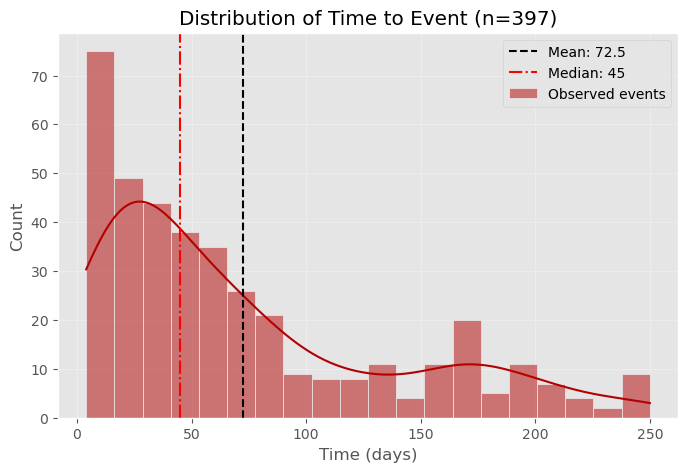

Mean time to death: 72.53 days (95% CI: 65.69–78.49)
Median time to death: 45 days (IQR: 85.00 days)
Sample size (biased, including only observed deaths): 397


In [13]:
# --- Use the function to compute usual time to death statistics
stats = hfu.compute_time_to_event_stats(df)
hfu.plot_time_to_event_distribution(stats, palette=selected_palette)
print(f"Mean time to death: {stats['mean']:.2f} days (95% CI: {stats['mean_ci'][0]:.2f}–{stats['mean_ci'][1]:.2f})")
print(f"Median time to death: {stats['median']:.0f} days (IQR: {stats['iqr']:.2f} days)")
print(f"Sample size (biased, including only observed deaths): {stats['n']}")

To better estimate the probability of survival over time, we should move beyond simple summary statistics and use a "right-censoring aware method" (i.e. an approach that accounts for patients who are lost to follow-up or survive beyond the study period). One effective method is the Kaplan–Meier survival analysis (https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator), a non-parametric approach well suited for time-to-event data with right-censoring. Each patient contributes to the estimate based on their follow-up time and whether the death event occurred.

The Kaplan–Meier estimator is defined as:

$$
\hat{S}(t) = \prod_{i: t_i \leq t} \left(1 - \frac{d_i}{n_i} \right)
$$

where:

- d: number of events (e.g. deaths) observed at a given time
- n: number of individuals at risk just before at a given time

We compute the cumulative death probability (risk) as the complement of our estimator ($1 - \hat{S}(t)$).

This approach avoids bias from censoring that would distort average-based estimates. To derive a "typical" time to death (if applicable) or median survival time, we can identify the time at which the survival probability drops to 50% (or cumulative death probability reaches 50%). To get an estimate of the chance of dying within 1 year, we can simply take the value of the estimated cumulative death curve at 365 days. This approach provides a robust and interpretable estimate answering Q1 and Q2.

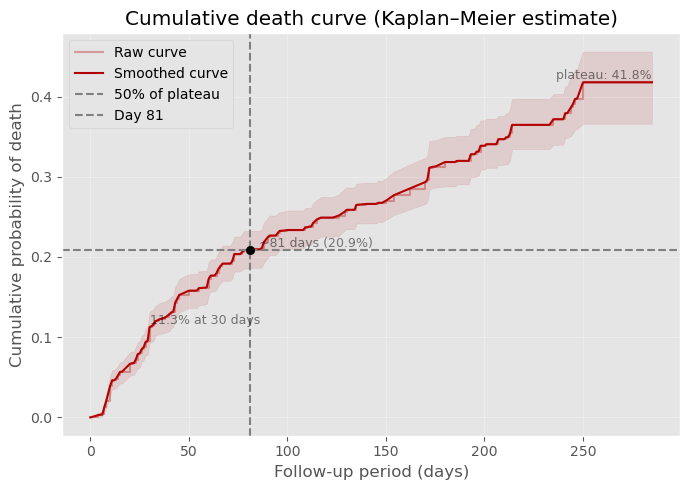

Estimated median time to death: ~81 days (at 20.89% cumulative)
Estimated plateau height: 41.77%
Estimated cumulative death rate at 30 days: 11.29%


In [14]:
# --- Compute and plot survival curve
km_stats = hfu.analyze_kaplan_meier(df, palette=selected_palette, plot=True)
if km_stats['median_time'] is not None:
    print(f"Estimated median time to death: ~{km_stats['median_time']:.0f} days (at {km_stats['median_cumulative_prob']:.2%} cumulative)")
print(f"Estimated plateau height: {km_stats['plateau_height']:.2%}")
if km_stats.get('prob_30_days') is not None:
    print(f"Estimated cumulative death rate at 30 days: {km_stats['prob_30_days']:.2%}")

### Q3: What factors impact survival?

To investigate which clinical features are associated with an increased risk of death, we compare the characteristics of patients who died (`DEATH_EVENT = 1`) versus those who survived (`DEATH_EVENT = 0`) during the follow-up period.

For **numeric variables** (e.g., age, ejection fraction), we compare the distributions between the two groups. Since the data may not be normally distributed, we use the **Mann-Whitney U test** (a non-parametric alternative to the t-test) to assess statistical significance.

For **categorical variables** (e.g., diabetes, sex), we compare the proportions of deaths across categories using the **Chi-square test of independence**.

This analysis helps us identify the "risk factors" that are significantly linked to heart failure mortality in this cohort.

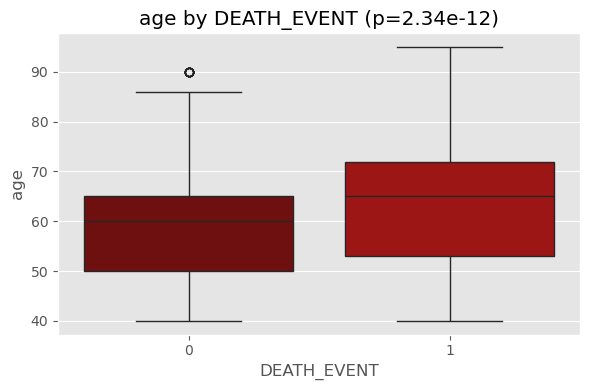

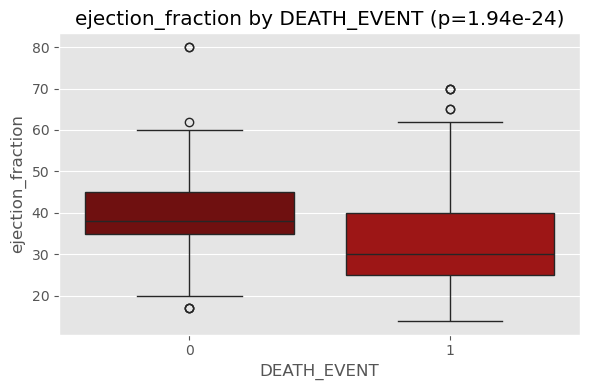

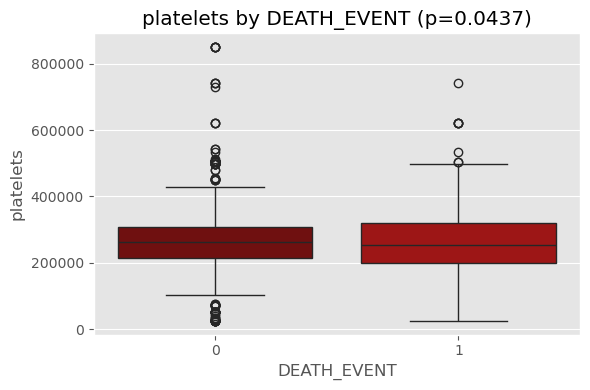

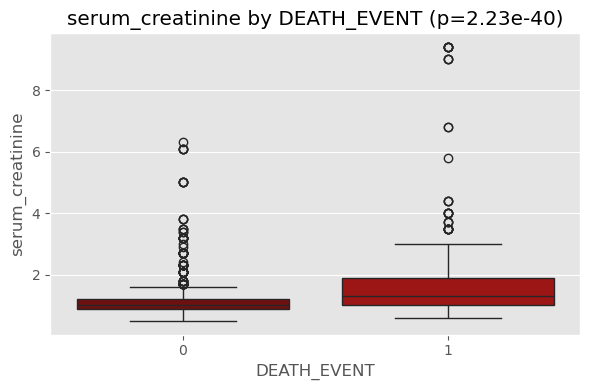

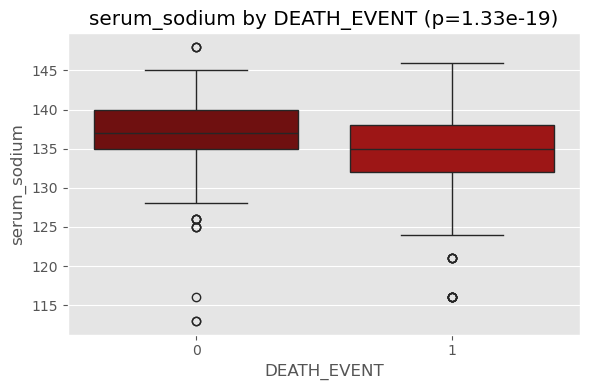

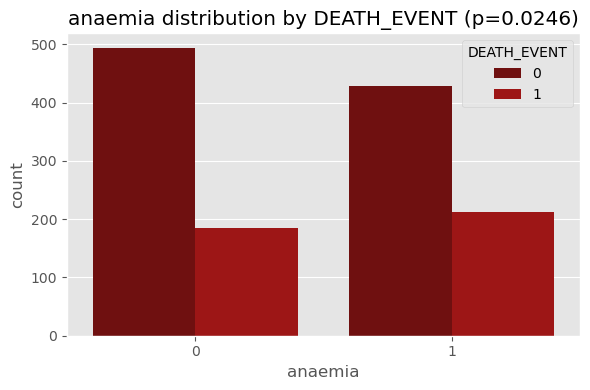

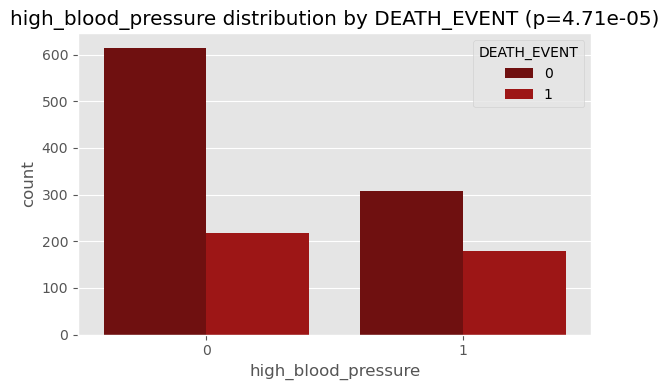


=== Summary of Significant Factors (p < 0.05) ===
Numeric: ['col', 'col', 'col', 'col', 'col']
Categorical: ['col', 'col']


In [15]:
# --- Analyze variable associations with the target
significant_factors = hfu.analyze_variable_associations(
    df, 
    target_col='DEATH_EVENT', 
    palette=selected_palette
)
print("\n=== Summary of Significant Factors (p < 0.05) ===")
print("Numeric:", [col for col, p in significant_factors['numeric']])
print("Categorical:", [col for col, p in significant_factors['categorical']])

### Q4: How well can we predict heart failure mortality?

To assess whether we can predict the likelihood of death based on clinical features, we will train and evaluate two machine learning models:
1. **Logistic Regression**: A linear, interpretable baseline.
2. **XGBoost Classifier**: A powerful non-linear gradient boosting model.

Methodological Note:
*   **Data Leakage Prevention**: We explicitly exclude the `time` variable from the predictors. In a real-world clinical setting, we want to predict the risk of death *at the time of diagnosis*, not knowing how long the follow-up will last. Including `time` would introduce data leakage (as seen in the EDA, shorter time is correlated with death).
*   **Class Imbalance**: The dataset is imbalanced (fewer deaths than survivals). We address this by using class weighting (`class_weight='balanced'` for Logistic Regression and `scale_pos_weight` for XGBoost) to ensure the models pay equal attention to the minority class.

We will use `DEATH_EVENT` as the target variable. We will evaluate the models using **Accuracy**, **Recall**, and **ROC-AUC**. We will also inspect feature importance to see which variables drive the predictions.

Tuning XGBoost hyperparameters (Classification)...
Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.8}


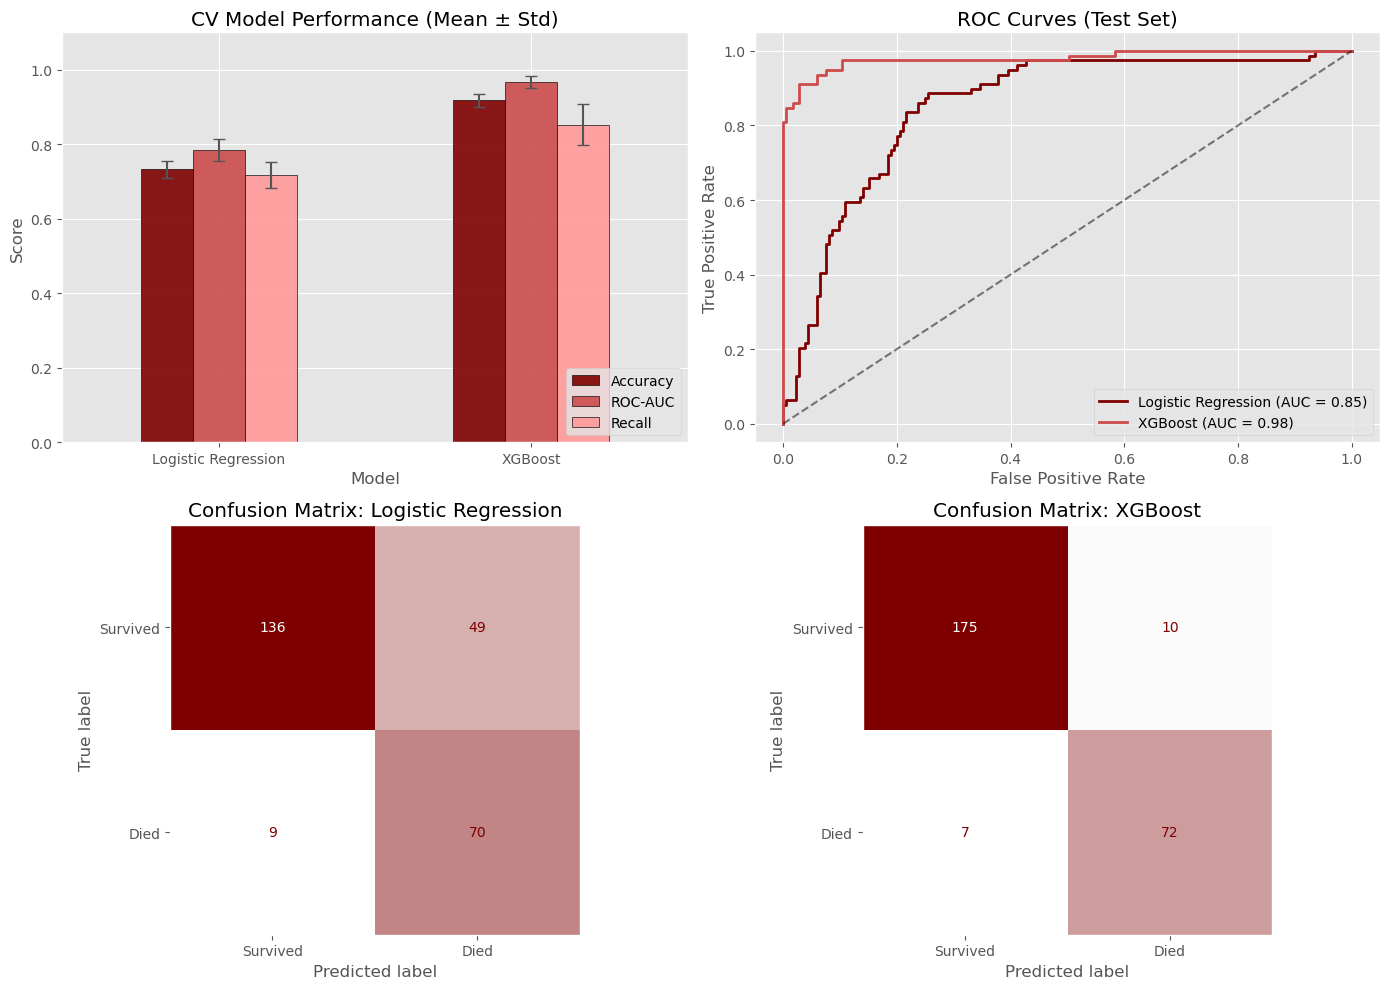


=== Model Accuracy (CV Mean ± Std) ===
Logistic Regression: 0.7320 ± 0.0225
XGBoost: 0.9176 ± 0.0169


In [16]:
# --- Train and Evaluate Models (Logistic Regression and XGBoost)
# Note: We enable hyperparameter tuning for XGBoost to optimize performance
model_results = hfu.compare_models_performance(
    df, 
    target_col='DEATH_EVENT', 
    palette=selected_palette,
    tune_xgb=True
)
print("\n=== Model Accuracy (CV Mean ± Std) ===")
cv_results = model_results['cv_results']
acc_res = cv_results[cv_results['Metric'] == 'Accuracy']
for _, row in acc_res.iterrows():
    print(f"{row['Model']}: {row['Mean Score']:.4f} ± {row['Std Dev']:.4f}")

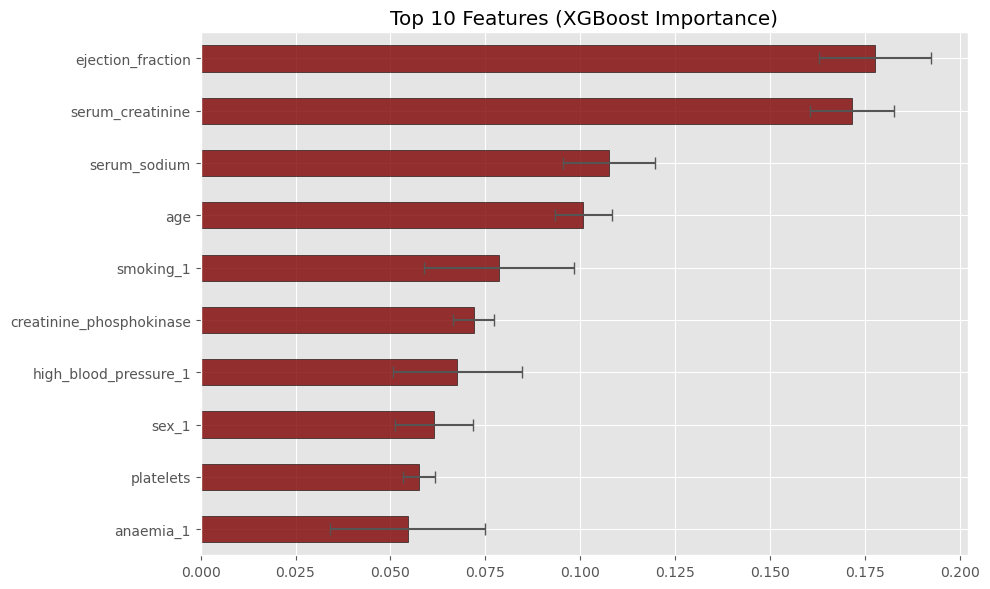

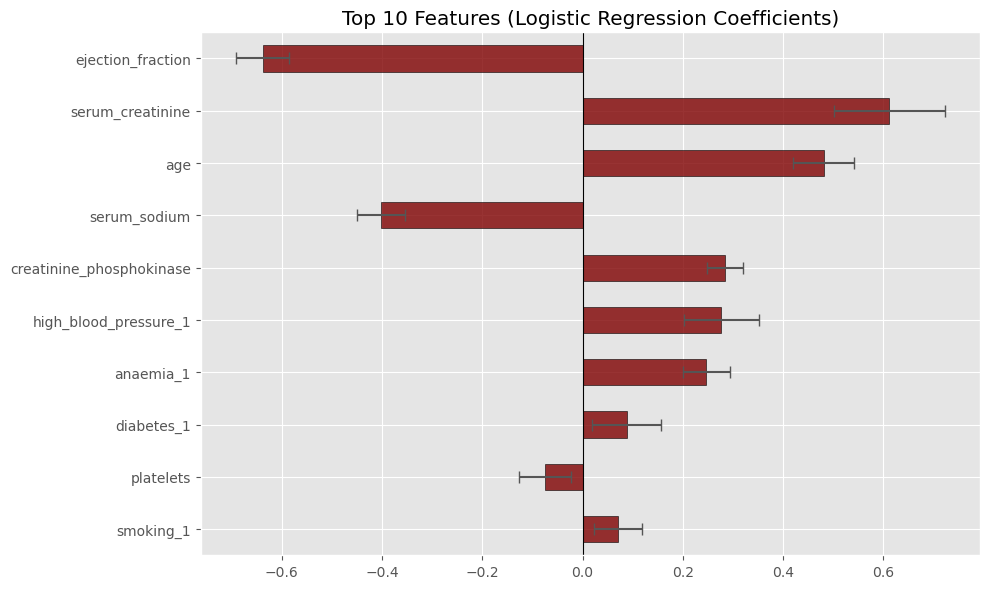

In [17]:
# --- Analyze Feature Importance (Logistic Regression and XGBoost)
hfu.analyze_feature_importance(
    model_results, 
    palette=selected_palette
)

Remarkably, the prediction accuracy reached very high levels, and a small set of features consistently emerged as strong predictors of low or high mortality across models. See the final section for a more in-depth discussion.

### Survival Regression: Cox Proportional Hazards and Survival XGBoost

While the classification models above predict the binary outcome of death, they discard the valuable time-to-event information. Here we implement "censoring-aware" models that use both the event status and the follow-up time to model the risk of death.

We compare two approaches:
1.  **Cox Proportional Hazards Model**: A semi-parametric linear model that provides interpretable hazard ratios.
2.  **Survival XGBoost**: A non-linear gradient boosting model optimized for survival analysis (using Cox loss).

We evaluate both models using the **Concordance Index (C-index)**, which measures how well the model predicts the ordering of survival times (0.5 = random, 1.0 = perfect).

Tuning XGBoost hyperparameters (Survival)...
Best Survival XGBoost Params: {'objective': 'survival:cox', 'eval_metric': 'cox-nloglik', 'random_state': 42, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 1}


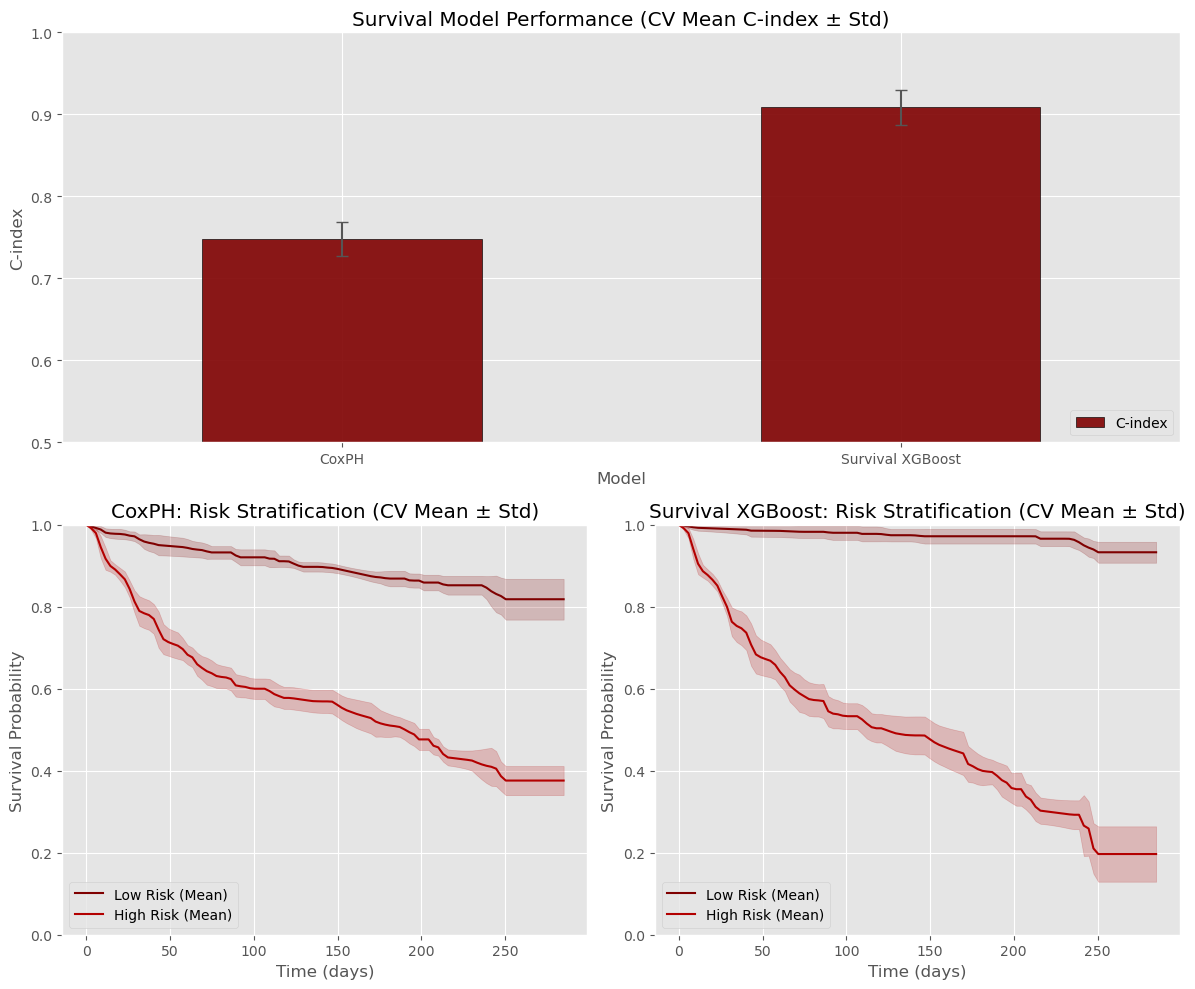


=== Survival Model Performance (CV Mean C-index) ===
CoxPH: 0.7478 ± 0.0207
Survival XGBoost: 0.9085 ± 0.0211


In [18]:
# --- Train and Evaluate Survival Models (CoxPH and Survival XGBoost)
survival_results = hfu.compare_survival_models_performance(
    df, 
    time_col='time', 
    event_col='DEATH_EVENT', 
    palette=selected_palette,
    tune_xgb=True # NB: We enable hyperparameter tuning for Survival XGBoost
)
print("\n=== Survival Model Performance (CV Mean C-index) ===")
cv_res = survival_results['cv_results']
# cv_results is already aggregated (Mean Score, Std Dev)
for _, row in cv_res.iterrows():
    print(f"{row['Model']}: {row['Mean Score']:.4f} ± {row['Std Dev']:.4f}")

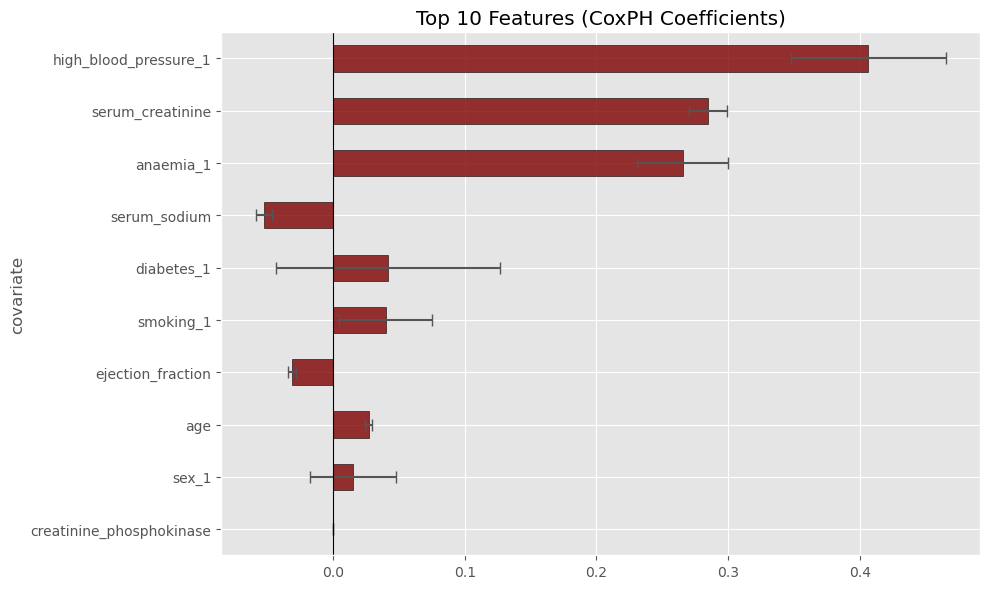

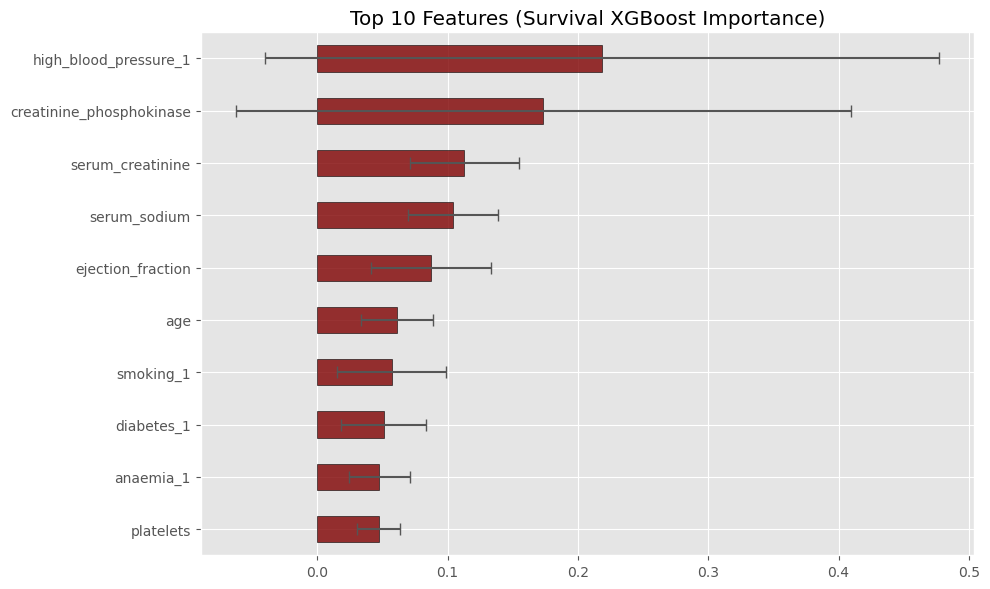

In [19]:
# --- Analyze Feature Importance for Survival Models
hfu.analyze_survival_feature_importance(
    survival_results, 
    palette=selected_palette
)

Remarkably, the survival prediction is very good, as shown by the high C-index and good separation of survival curves of patients categorized by the model. Also in this case, a small set of features consistently emerged as strong predictors of low or high mortality across models. See the final section for a more in-depth discussion.

### Stratified Survival Analysis

Beyond binary prediction or survival modeling used in the previous sections, we may want to understand how specific factors influence the time to death in a more direct, nonparametric way. We can do this using Stratified Kaplan-Meier Curves. This allows us to see how the survival probability evolves over time for different groups (e.g., different age groups, presence of diabetes, etc.). This will enable us to conclude wich features are predictive of high mortality risk from a different angle (that teats correctly the censored nature of our observation, unlike the naive calssification approaches we adopted before).


=== Survival Analysis by age ===


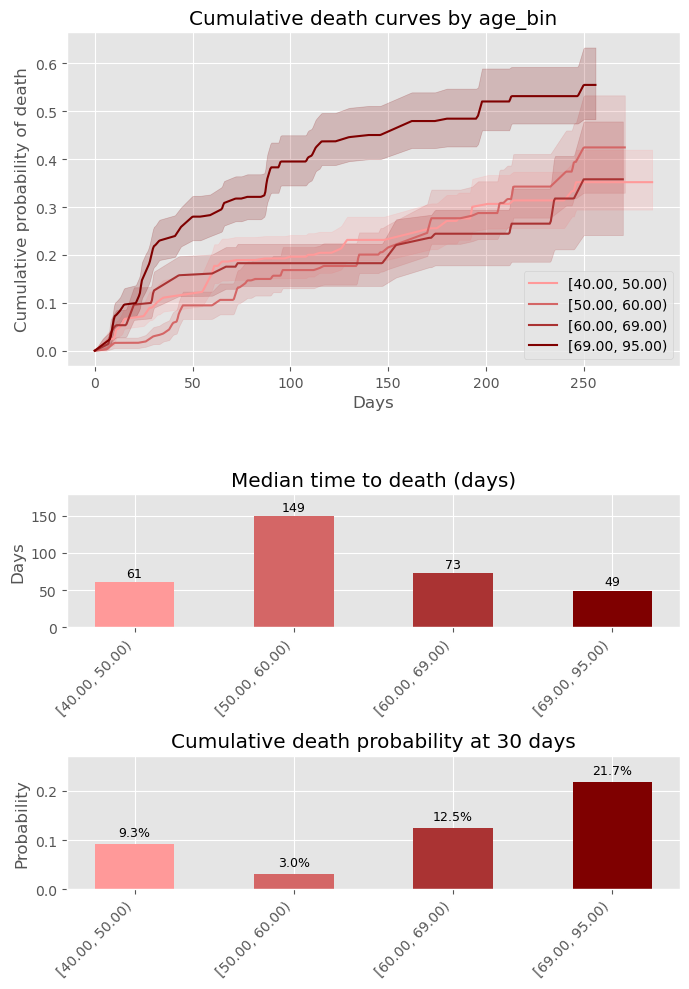


=== Survival Analysis by ejection_fraction ===


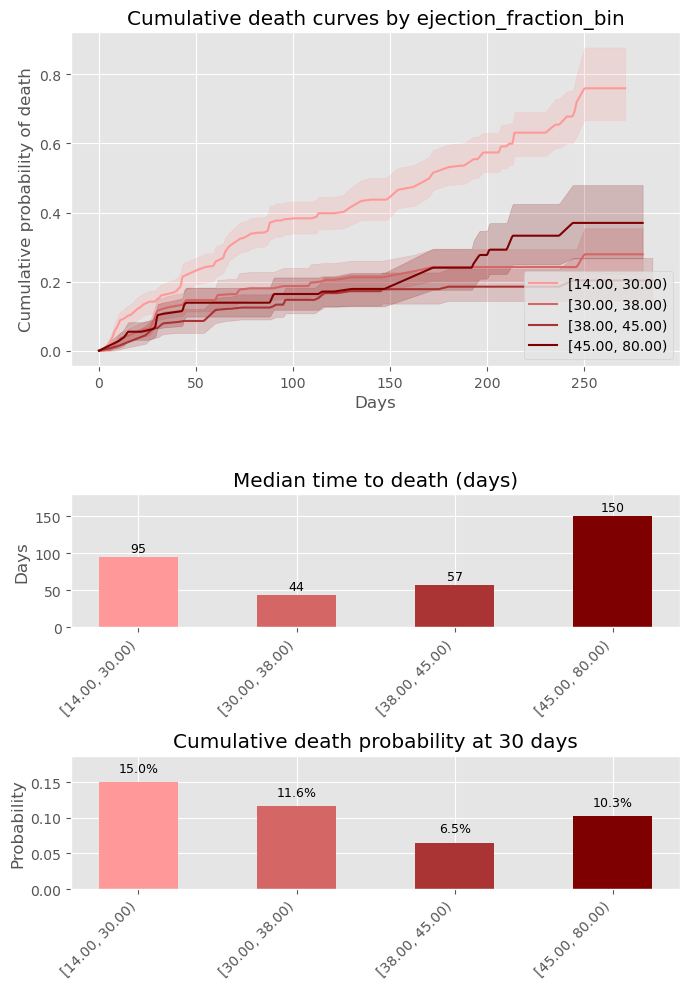


=== Survival Analysis by serum_creatinine ===


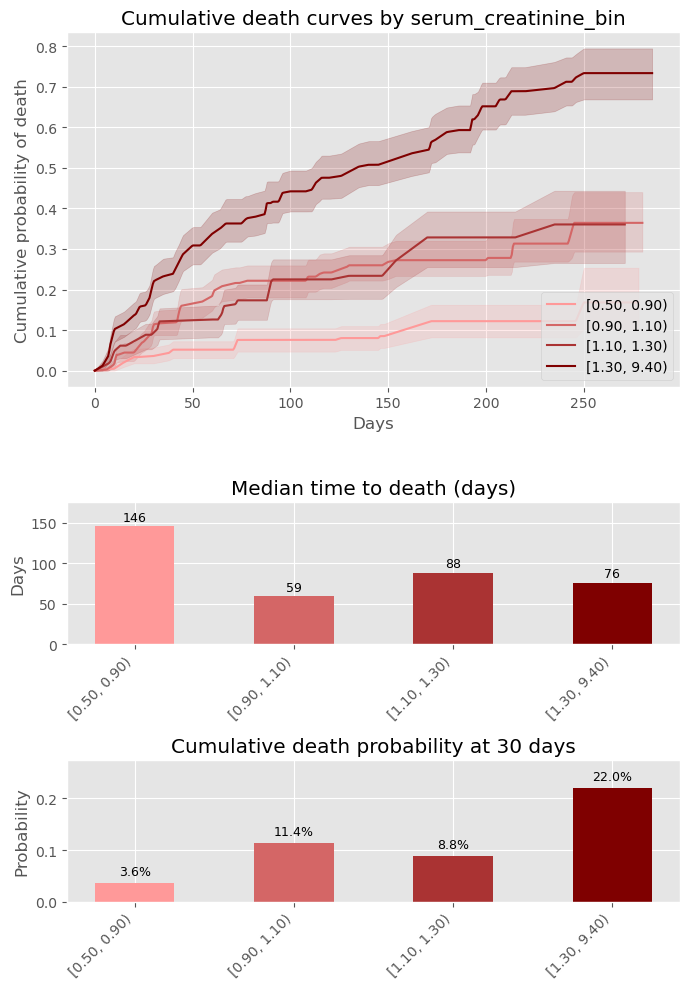


=== Survival Analysis by serum_sodium ===


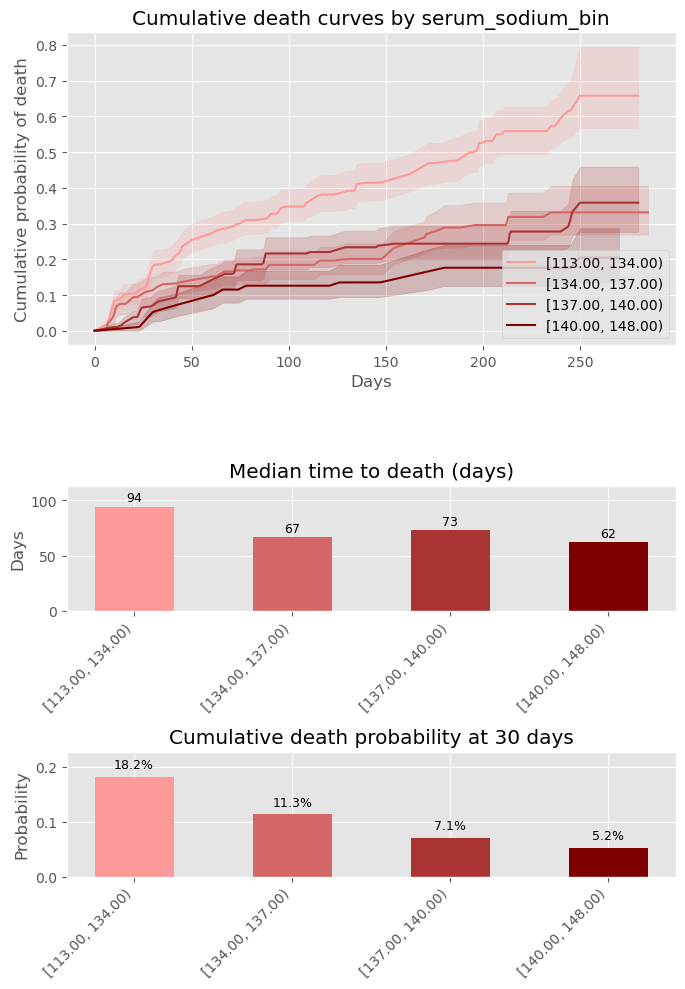


=== Survival Analysis by anaemia ===


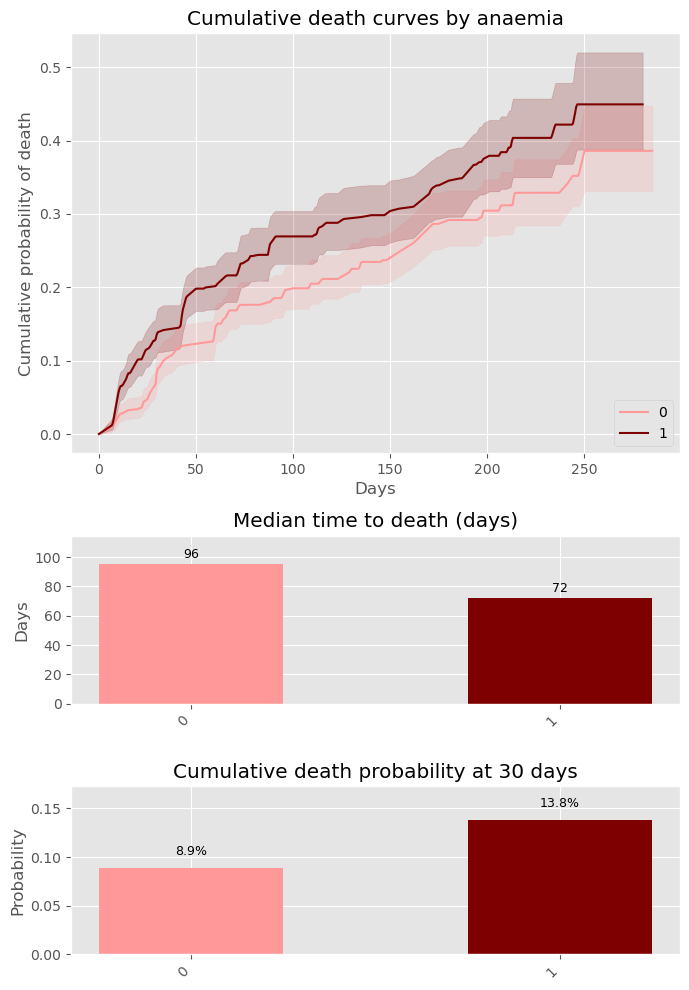


=== Survival Analysis by diabetes ===


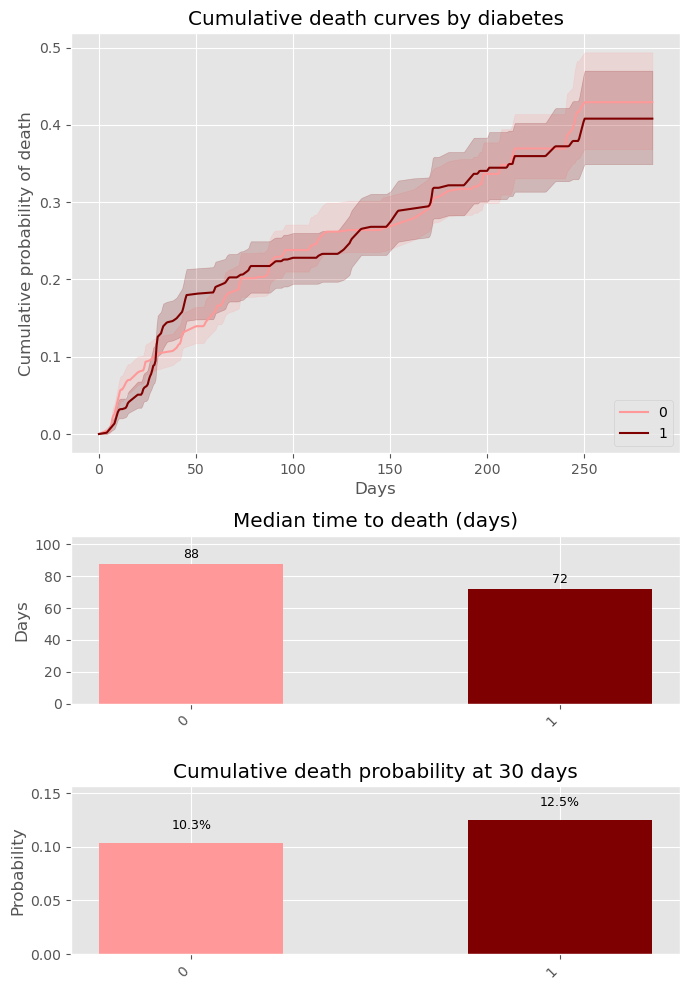


=== Survival Analysis by high_blood_pressure ===


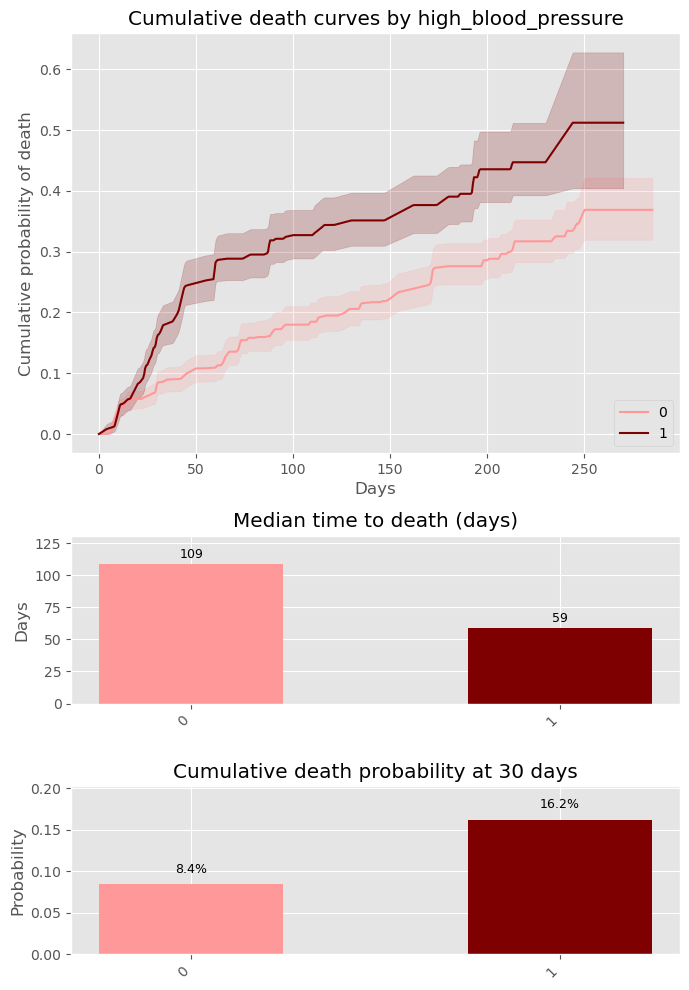


=== Survival Analysis by sex ===


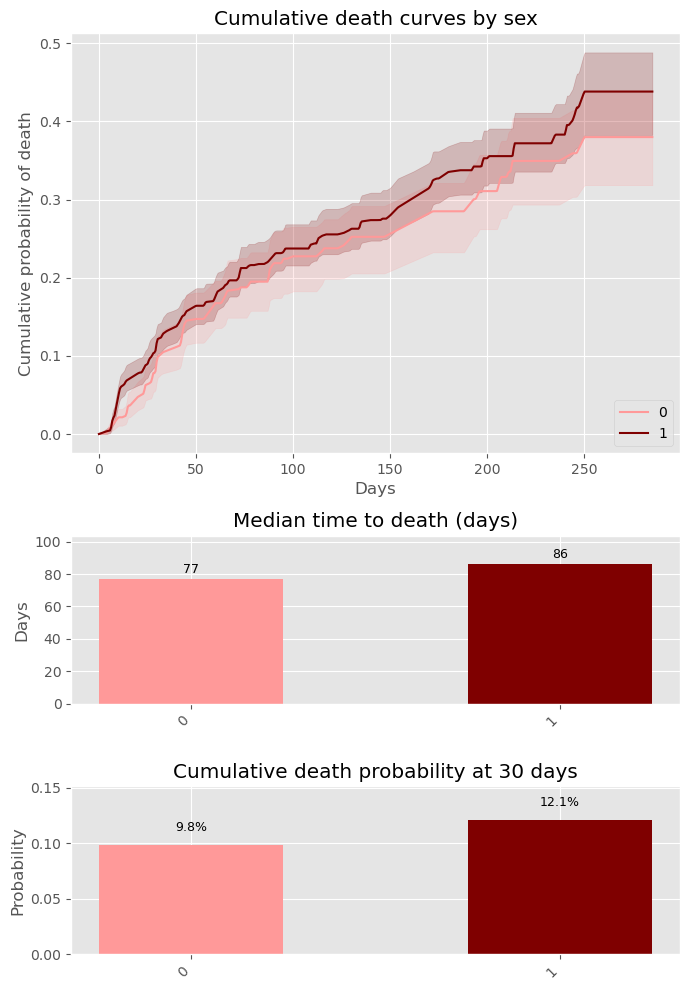


=== Survival Analysis by smoking ===


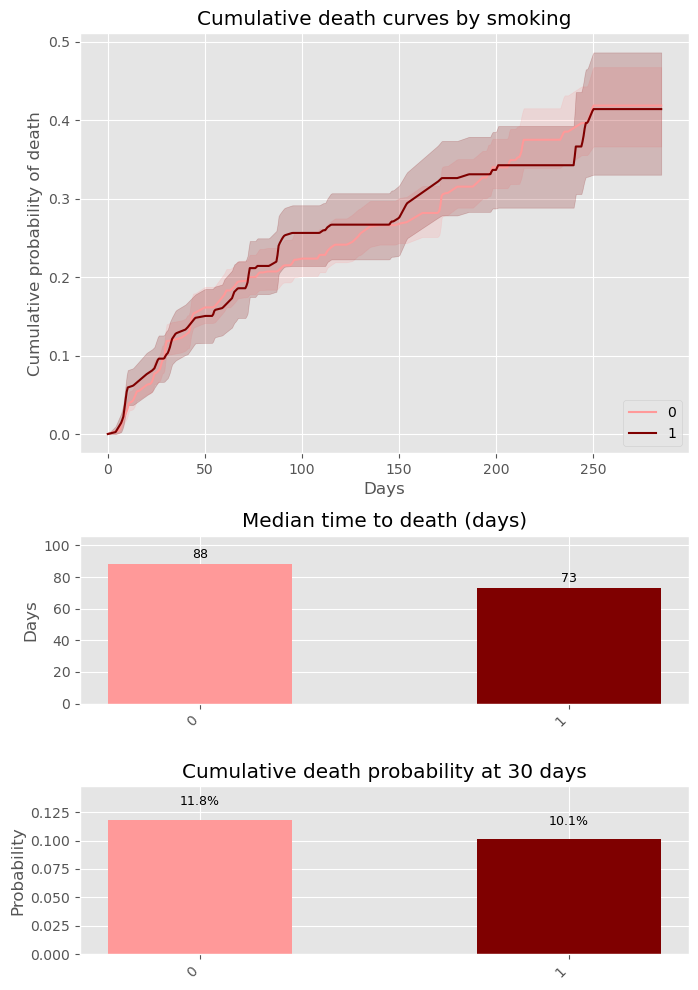

In [20]:
# --- Analyze grouped Kaplan-Meier survival curves for selected variables
vars_to_analyze = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for col in vars_to_analyze:
    is_numeric = pd.api.types.is_numeric_dtype(df[col])
    print(f"\n=== Survival Analysis by {col} ===")
    hfu.analyze_grouped_kaplan_meier(
        df, 
        group_col=col, 
        is_numeric=is_numeric, 
        target_day=30,
        plot=True,
        bootstrap_ci=True,
        n_jobs=-1 #NB: Use all available CPU cores
    )

## Final Summary and Conclusions

In this analysis, we explored the Heart Failure Clinical Records dataset to understand survival patterns and risk factors. We employed a multi-faceted approach, combining statistical tests, survival analysis (Kaplan-Meier), and machine learning (Logistic Regression, XGBoost).

### Short answers to the assignment questions

1. In this cohort, what is the probability of death within 30 days?
2. In this cohort, how long does it usually take to die from heart failure?
3. What factors impact survival?
4. How well can we predict heart failure mortality?

**Q1: In this cohort, what is the probability of death within 30 days?**
**A1:** The probability of death increases over time. Using the Kaplan–Meier estimator, we visualized the cumulative “death curve” and estimated the probability of death at 30 days to be approximately 11%, providing a concrete short-term risk assessment.

**Q2: In this cohort, how long does it usually take to die from heart failure?**
**A2:** The Kaplan–Meier analysis also provided an estimate of a “typical time to death” for the cohort. Based on the cumulative death curve, the time at which 50% of the plateau value is reached is approximately 81 days, meaning that half of the patients who eventually die tend to do so within about three months.

**Q3: What factors impact survival?**
**A3:** Our statistical analysis (Mann-Whitney U and Chi-square) and Machine Learning feature importance identified several key drivers of mortality:
*   **Age**: Older age is a strong risk factor.
*   **Serum Creatinine**: Elevated levels (kidney failure) are strongly associated with death.
*   **Ejection Fraction**: Lower percentages (weak pumping) increase mortality risk.
*   **Serum Sodium**: Lower levels (hyponatremia) are linked to poor outcomes.

**Q4: How well can we predict heart failure mortality?**
**A4:** Quite well. We successfully trained Machine Learning models such as Logistic Regression and XGBoost to predict the binary `DEATH_EVENT` with high accuracy.
*   **Performance**: Both models demonstrated strong predictive capability. **XGBoost** achieved an **accuracy of ~92%**, significantly outperforming the **Logistic Regression** baseline (accuracy of ~73%). This suggests that non-linear interactions between clinical features are important for accurate prediction. Crucially, these results were obtained using **Stratified K-Fold Cross-Validation**, ensuring that the high performance (particularly for XGBoost) is robust and not due to overfitting on a specific train-test split.
*   **Hyperparameter Tuning**: We further optimized the XGBoost model using Randomized Search, which fine-tuned the model parameters for potentially better generalization.
*   **Survival Regression**: We also implemented a **Cox Proportional Hazards model**, which achieved a high Concordance Index (C-index ~90% in the XGB case). This model confirms the importance of the key features (Age, Ejection Fraction, Serum Creatinine) while accounting for the time-to-event nature of the data, providing hazard ratios that quantify the relative risk associated with each factor.
*   **Trade-offs**:
    *   **Logistic Regression** offers interpretability but assumes linear relationships.
    *   **XGBoost** provides superior predictive performance by capturing complex patterns but is less transparent ("black box").
    *   **Cox Model** bridges the gap by handling censored data and providing interpretable hazard ratios, making it highly valuable for clinical risk assessment over time.

### Physiological Interpretation

Elevated serum creatinine serves as a marker for impaired renal filtration, often indicative of cardiorenal syndrome where cardiac dysfunction compromises kidney perfusion. Hyponatremia (low serum sodium) typically arises from fluid retention and neurohormonal activation characteristic of heart failure, leading to a dilutional effect. Anemia reduces the blood's oxygen-carrying capacity, necessitating increased cardiac output and thereby placing additional hemodynamic strain on the heart. Furthermore, hypertension increases afterload, forcing the myocardium to pump against greater resistance, which accelerates ventricular remodeling and failure. Collectively, these pathophysiological mechanisms synergistically compromise cardiac function, underscoring their strong predictive value for mortality in heart failure patients.

### Clinical Recommendations

Based on these findings, clinical attention should be prioritized for elderly patients and those with compromised renal function (high creatinine) or low ejection fraction. Early intervention in these high-risk groups could potentially improve survival rates.